In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\DataScience\LoanData\Loandata.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**DATA UNDERSTANDING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
print(df["Gender"].unique())
print(df["Married"].unique())
print(df["Dependents"].unique())
print(df["Education"].unique())
print(df["Self_Employed"].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]


In [6]:
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Dependents"].value_counts())
print(df["Education"].value_counts())
print(df["Self_Employed"].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


**Drop Unimportant columns as per feature selection (Filter Methods)**

In [7]:
df.drop(columns=["Loan_ID"],inplace=True)

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [10]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [11]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [12]:
df["Credit_History"] = df["Credit_History"].replace({1:"Good",0:"Bad"})

In [13]:
df["Credit_History"].value_counts()

Credit_History
Good    475
Bad      89
Name: count, dtype: int64

In [14]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [15]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [16]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [17]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**
Create New columns as per requirements**

In [18]:
df["Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [19]:
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [20]:
continuous = ['Income','LoanAmount']
categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
count = ['Dependents','Loan_Amount_Term']

In [21]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

**
Exploratory Data Analysis (EDA)**

In [22]:
df[continuous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


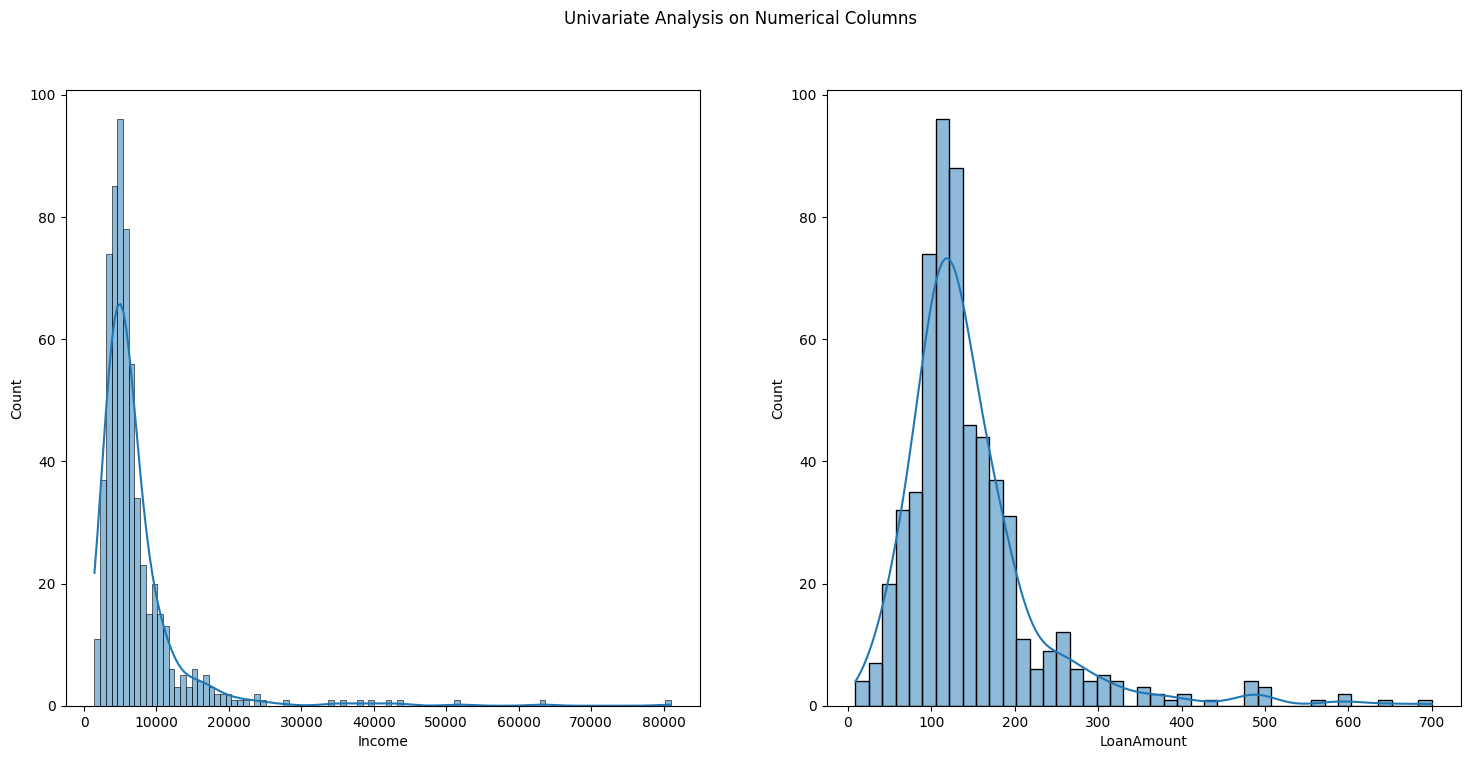

In [23]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df["Income"],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [24]:
df[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

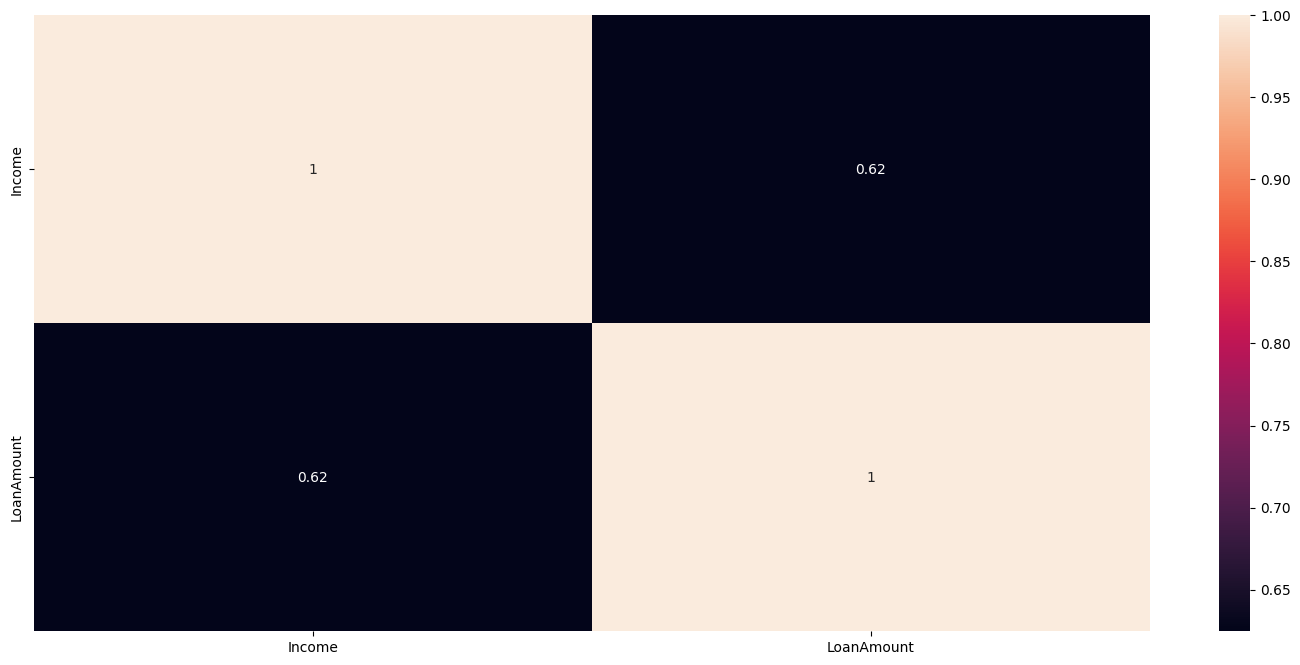

In [25]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

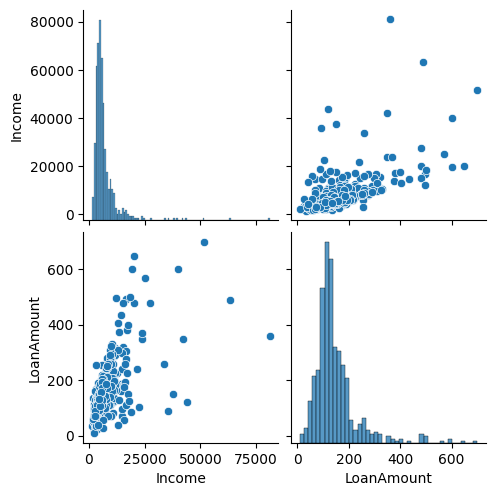

In [26]:
sns.pairplot(df[continuous])
plt.show()

In [27]:
df[categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,489,398,480,500,475,233,422


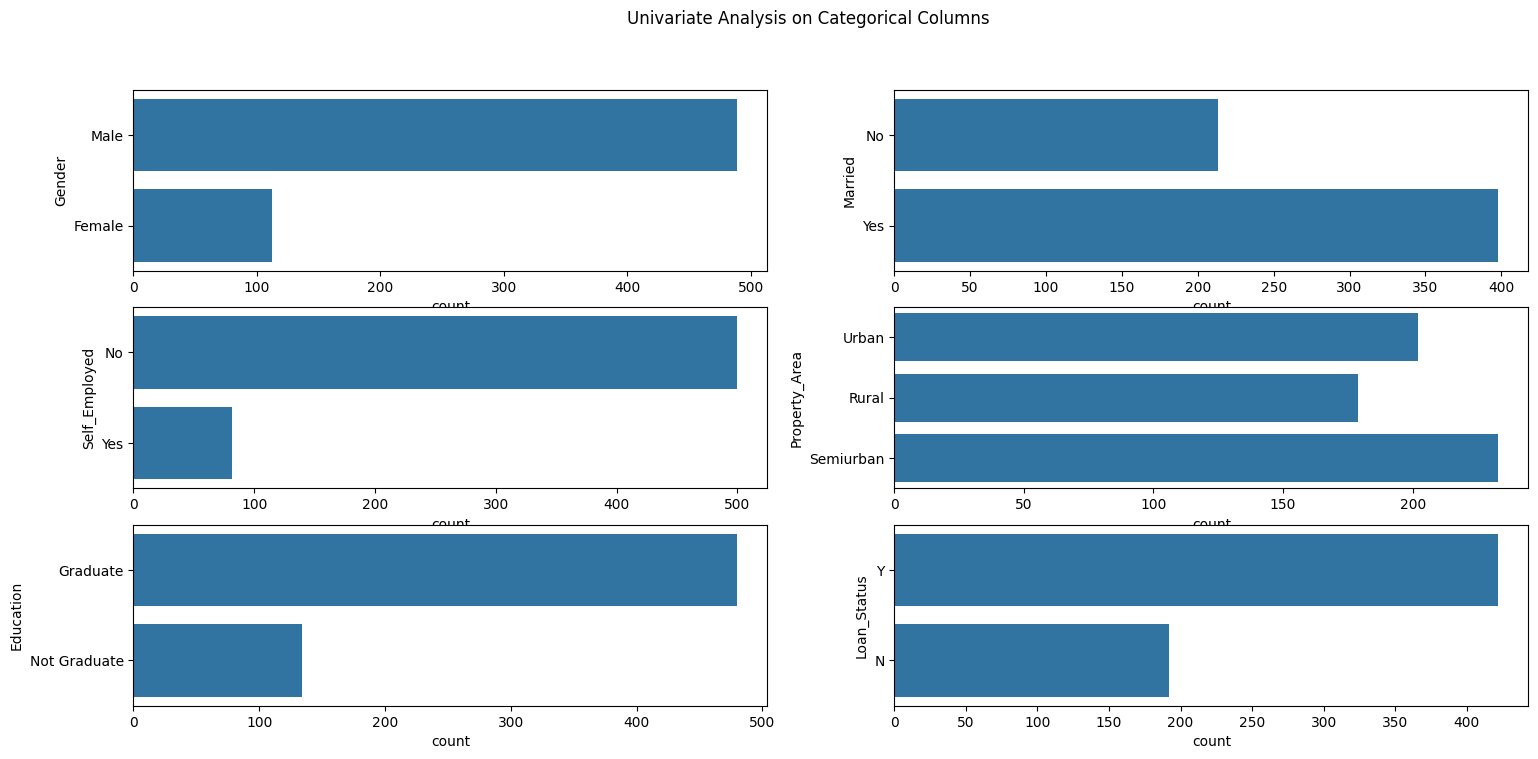

In [28]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(3,2,1)
sns.countplot(df['Gender'])

plt.subplot(3,2,2)
sns.countplot(df['Married'])

plt.subplot(3,2,3)
sns.countplot(df['Self_Employed'])

plt.subplot(3,2,4)
sns.countplot(df['Property_Area'])

plt.subplot(3,2,5)
sns.countplot(df['Education'])

plt.subplot(3,2,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

In [29]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**Check for skewness**

In [30]:
df[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**Check Outliers**

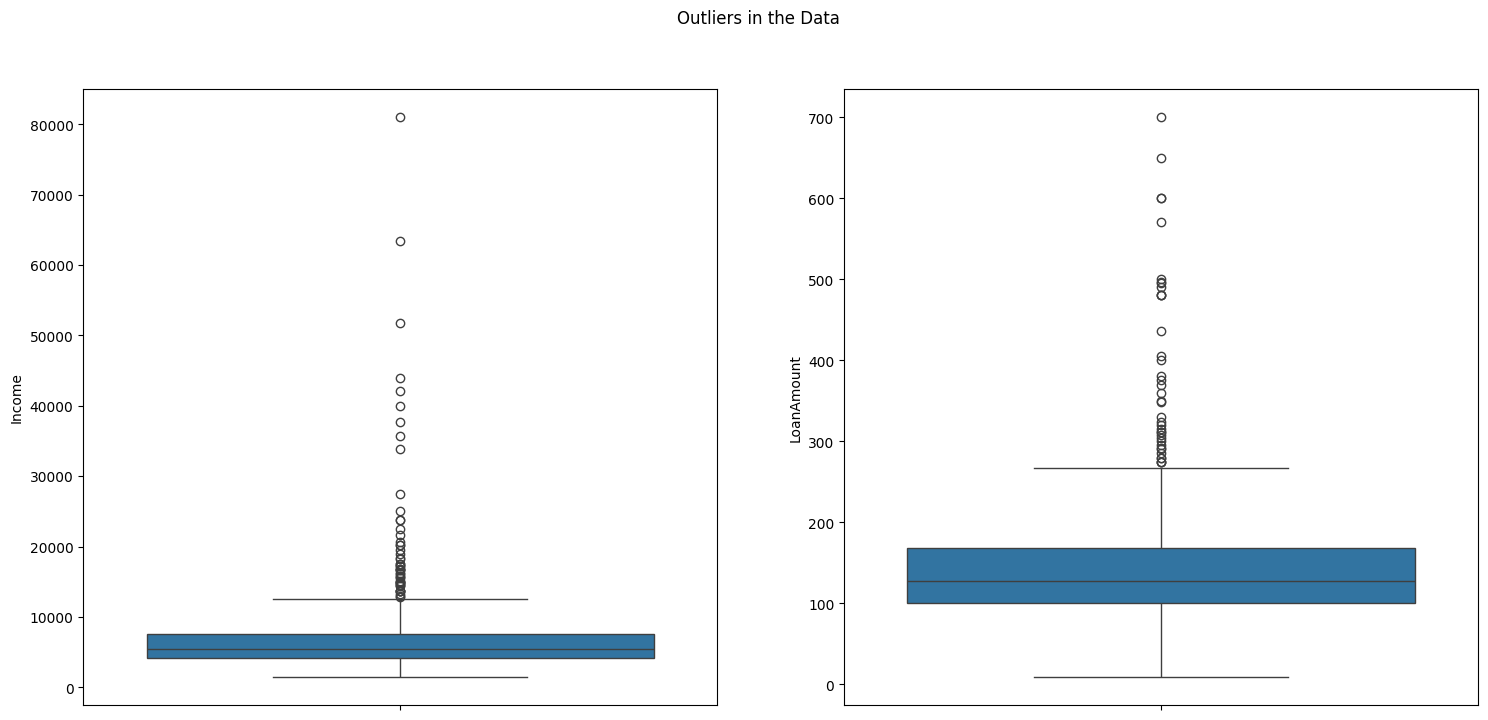

In [31]:
plt.subplot(1,2,1)
sns.boxplot(df["Income"])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

**
Data Preprocessin**g

1.Data Cleaning
     Wrong data
     Missing values
     wrong data type
     duplicates
     outliers
2.Data Wrangling
     Transformation (applicable on continuous)
     scaling (applicable on continuous)
     encoding (applicabble on categorical)

In [32]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

In [33]:
df.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

**Missing values Treatment**

In [34]:
df['Dependents'] = df['Dependents'].fillna(0)

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df = df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

**Data type conversion**

In [35]:
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

**Outliers Treatment**

In [36]:
# Outliers should be retrained (Because really some people will have high income)

**Encoding**

In [37]:
df.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [38]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Married'] = df['Married'].replace({'Yes':1,'No':0})
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area'] = df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
df['Credit_History'] = df['Credit_History'].replace({'Good':1,'Bad':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})

**Transformation**

In [39]:
from scipy.stats import boxcox
df["Income"],a = boxcox(df['Income'])
df['LoanAmount'],c = boxcox(df["LoanAmount"])

In [40]:
print(f"Lambda for Income: {a}")       # Output: Lambda for Income: -0.53
print(f"Lambda for LoanAmount: {c}")  # Output: Lambda for LoanAmount: 0.09

Lambda for Income: -0.5309565183744149
Lambda for LoanAmount: 0.09989117333785062


In [41]:
df[continuous].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [42]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

**X&y**

In [43]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

**Best Random state Number**

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Lists to store training and CV scores
Train = []
CV = []

# Loop over different random states
for i in range(0, 100):
    # Split the data using the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Calculate and store the training score
    train_score = model.score(X_train, y_train)
    Train.append(train_score)
    
    # Calculate and store the cross-validation score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    CV.append(cv_score)

# Create a DataFrame to compare training and CV scores
em = pd.DataFrame({"Train": Train, "CV": CV})

# Filter rows where the difference between Train and CV scores is less than or equal to 0.05
gm = em[abs(em["Train"] - em["CV"]) <= 0.05]

# Find the index of the maximum CV score in the filtered DataFrame
rs = gm[gm["CV"] == gm["CV"].max()].index.tolist()[0]

# Output the best random state
print("Best random state number:", rs)

Best random state number: 10


**Train-test-split**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

**Modelling & Evaluation**

1.Logistic Regression

In [46]:
# Modelling
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# Prediction on train data
ypred_train = log_reg.predict(X_train)

# train accuracy
from sklearn.metrics import accuracy_score
print("Train_accuracy :",accuracy_score(y_train,ypred_train))

# Cross validation score
from sklearn.model_selection import cross_val_score
print("CV Score :",cross_val_score(log_reg,X_train,y_train,cv=5,scoring="accuracy").mean())

##prediction on test data 
ypred_test = log_reg.predict(X_test)

#test accuracy
from sklearn.metrics import accuracy_score
print("Test_accuracy :",accuracy_score(y_test,ypred_test))

Train_accuracy : 0.8226950354609929
CV Score : 0.817955182072829
Test_accuracy : 0.7735849056603774


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[14 21]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        35
           1       0.76      0.96      0.85        71

    accuracy                           0.77       106
   macro avg       0.79      0.68      0.69       106
weighted avg       0.78      0.77      0.75       106



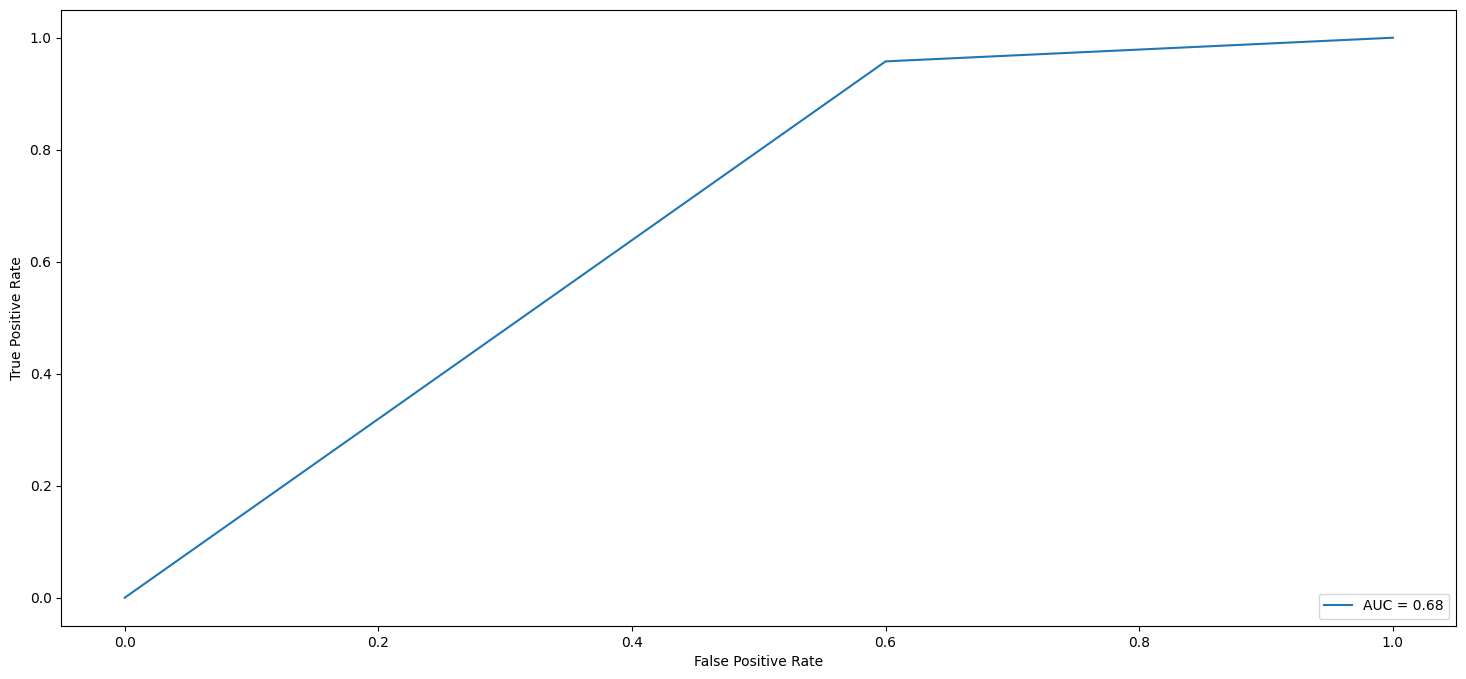

In [48]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

In [49]:
#AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.6788732394366197

2.K-NN

In [50]:
#Hyperparamter Tuning
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors" : list(range(1,50)),'p':[1,2]}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator, param_grid, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

#knn with best hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [51]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = knn_grid.best_estimator_
knn.fit(X_train,y_train)

# Prediction on Train data
ypred_train = knn.predict(X_train)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(knn,X_train,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = knn.predict(X_test)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8037825059101655
Cross_validation_score : 0.7635014005602241
Test accuracy : 0.7264150943396226


3.Support Vector Machine (SVM)

In [52]:
# Hyperparameter tuning
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.001,0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [53]:
#Modelling
svm = svm_grid.best_estimator_
svm.fit(X_train,y_train)

# Prediction on Train data
ypred_train = svm.predict(X_train)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(svm,X_train,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = svm.predict(X_test)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8250591016548463
Cross_validation_score : 0.8250420168067226
Test accuracy : 0.7735849056603774



4.Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

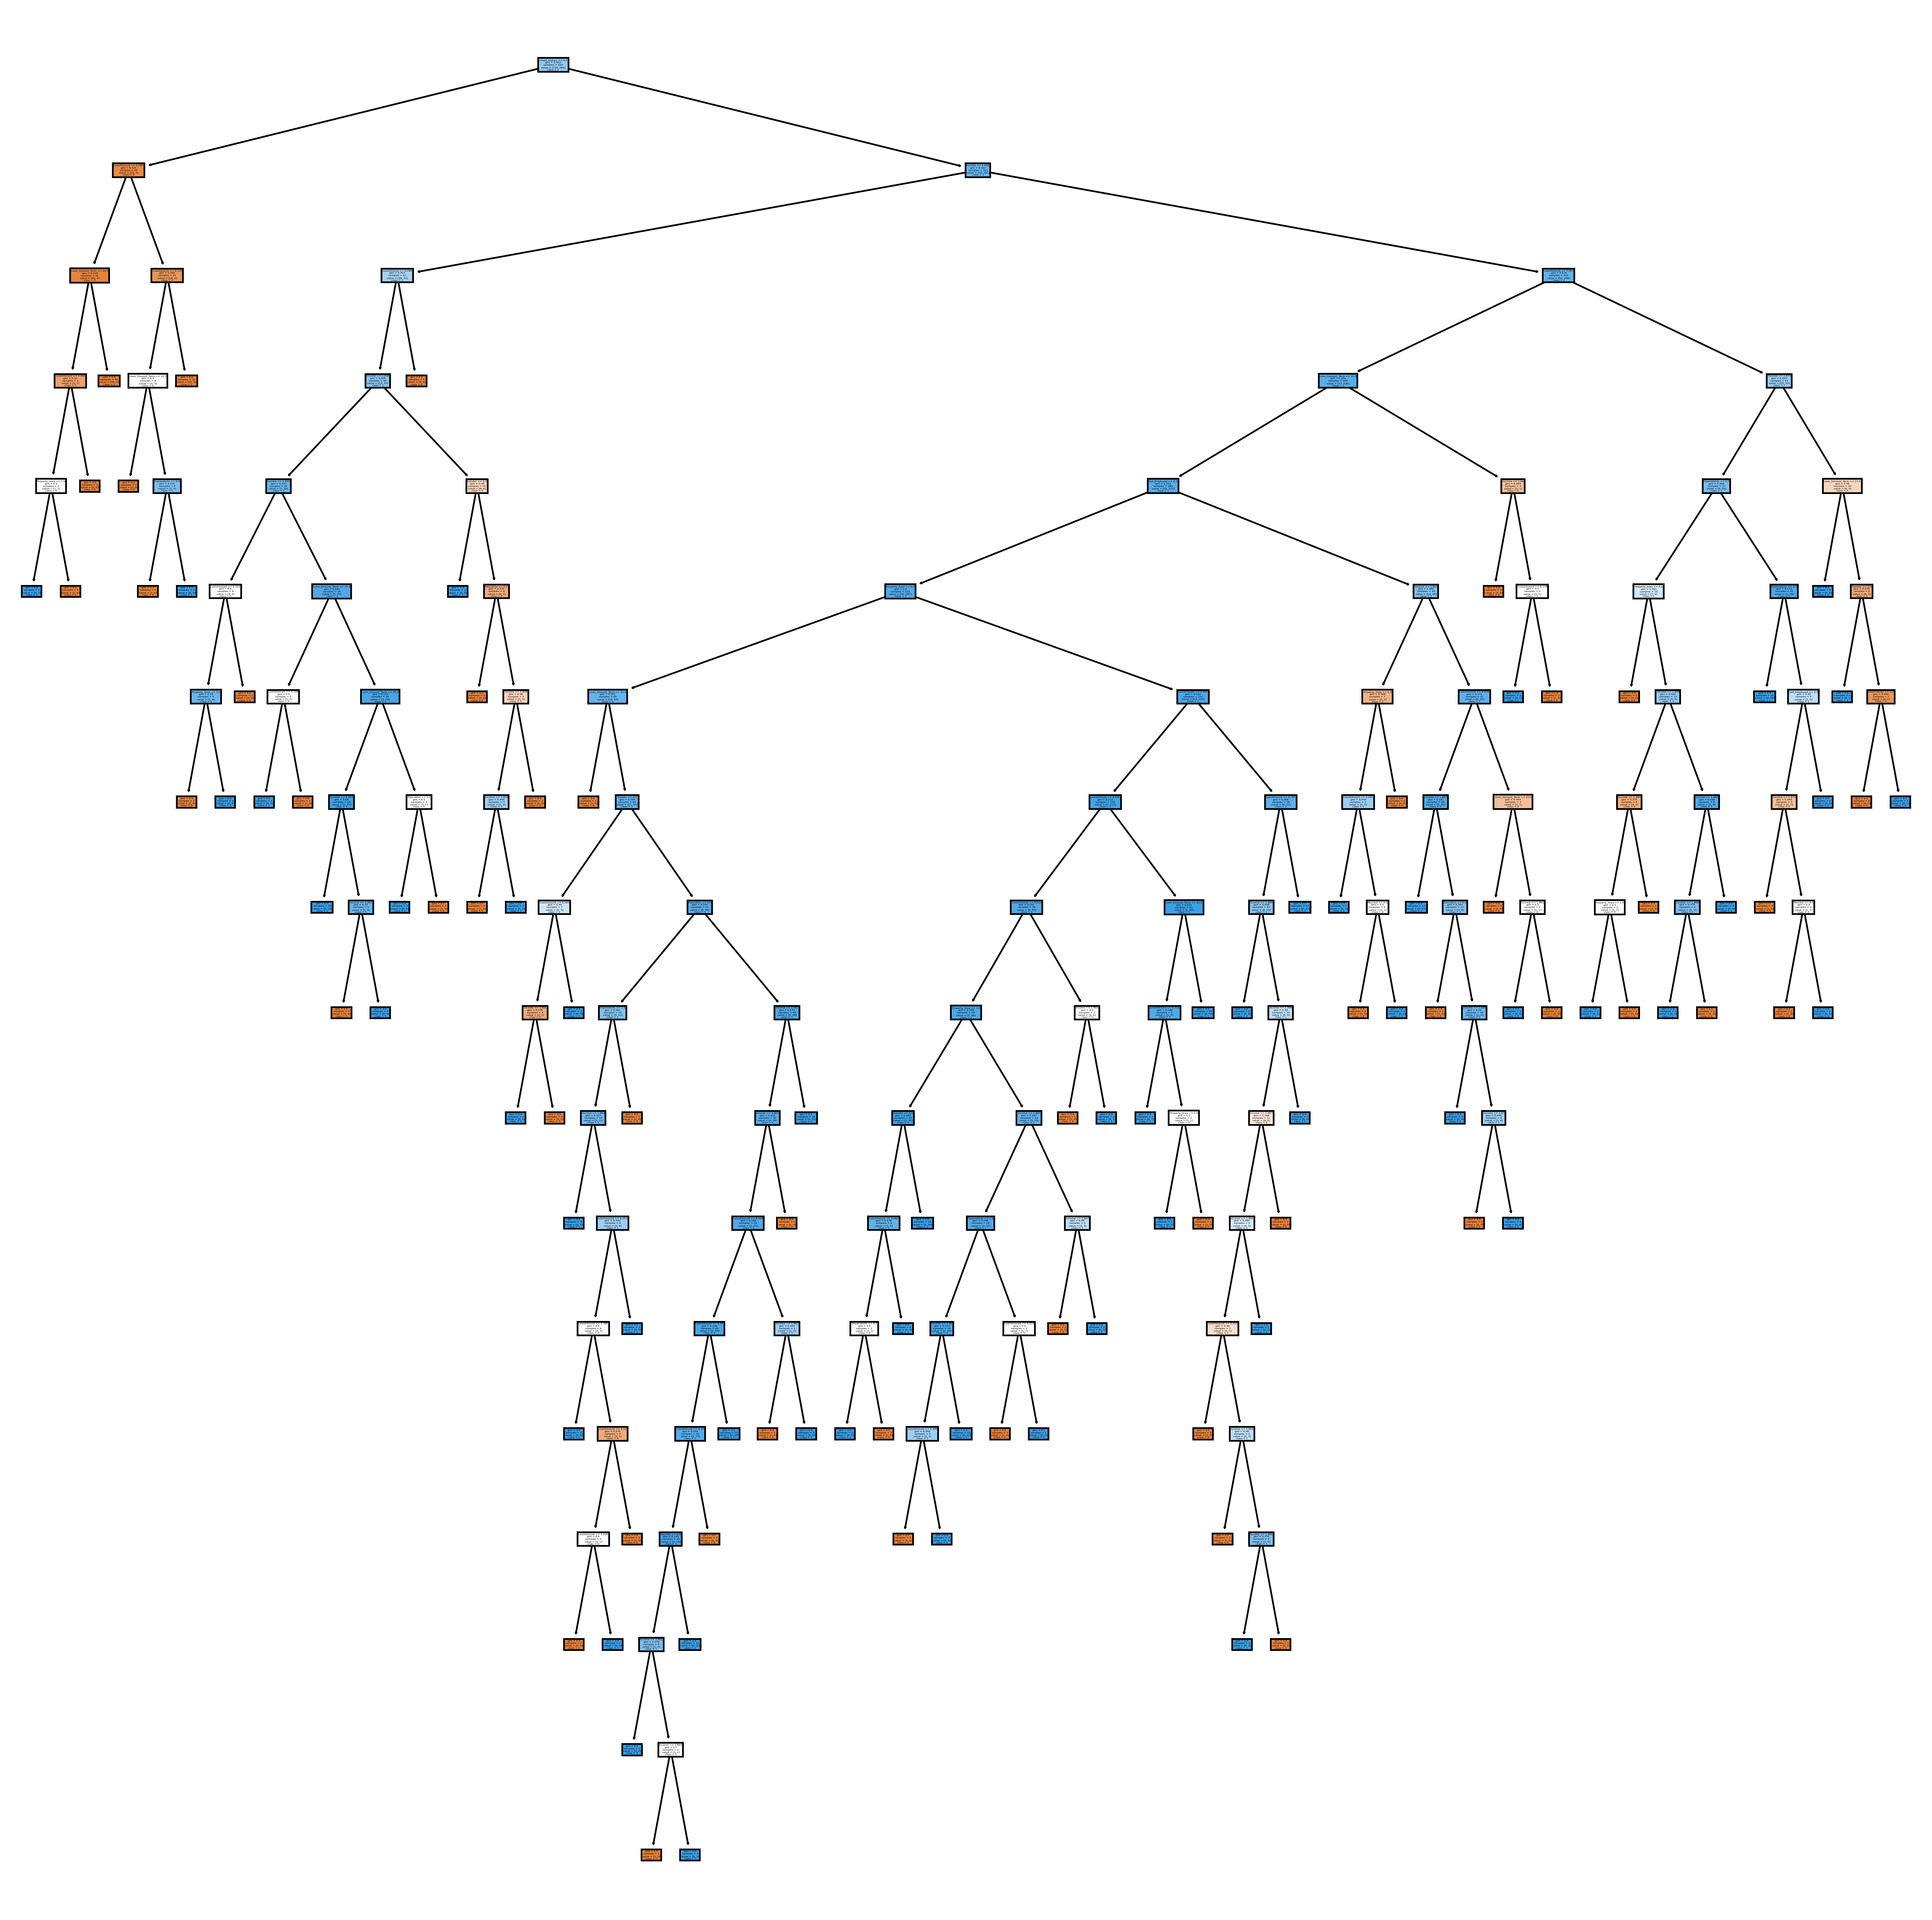

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
         feature_names=X_train.columns.tolist(),
         class_names=['0','1'])
plt.show()

In [56]:
#Hyperparameter tuning
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,17))}
dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=True)

In [57]:
#important Features
feats = pd.DataFrame(dt_grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])
important_features_dt = feats[feats["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

In [58]:
# Selecting train & test data
X_train_dt = X_train[important_features_dt]
X_test_dt  = X_test[important_features_dt]

#modelling
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

#Prediction on train data
ypred_train = dt.predict(X_train_dt)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(dt,X_train_dt,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = dt.predict(X_test_dt)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8250591016548463
Cross_validation_score : 0.8250420168067226
Test accuracy : 0.7735849056603774


5.Random Forest Classifier

In [59]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,30))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(n_estimators=20, random_state=True)

In [60]:
# important features
feats = pd.DataFrame(rf_grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=["Importance"])
important_features_rf = feats[feats["Importance"]>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [61]:

# Selecting train & test data
X_train_rf = X_train[important_features_rf]
X_test_rf  = X_test[important_features_rf]

#modelling
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Prediction on train data
ypred_train = rf.predict(X_train_rf)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(rf,X_train_rf,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = rf.predict(X_test_rf)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 1.0
Cross_validation_score : 0.8062745098039216
Test accuracy : 0.7735849056603774


6.AdaBoost Classifier

In [62]:
# Hyperparameter tuning
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,50))}
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)
ab_grid.best_estimator_

AdaBoostClassifier(n_estimators=7, random_state=True)

In [63]:
# important features
feats = pd.DataFrame(ab_grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=["Importance"])
important_features_ab = feats[feats["Importance"]>0].index.tolist()
important_features_ab

['Dependents', 'LoanAmount', 'Credit_History', 'Property_Area', 'Income']

In [64]:
# Selecting train & test data
X_train_ab = X_train[important_features_ab]
X_test_ab  = X_test[important_features_ab]

#modelling
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

#Prediction on train data
ypred_train = ab.predict(X_train_ab)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(ab,X_train_ab,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = ab.predict(X_test_ab)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.83451536643026
Cross_validation_score : 0.8274789915966387
Test accuracy : 0.7452830188679245


7.Gradient Boost Classifier

In [65]:
# Hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,10)),
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, n_estimators=4, random_state=True)

In [66]:
# important features
feats = pd.DataFrame(gb_grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=["Importance"])
important_features_gb = feats[feats["Importance"]>0].index.tolist()
important_features_gb

['Married',
 'Dependents',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [67]:
# Selecting train & test data
X_train_gb = X_train[important_features_gb]
X_test_gb  = X_test[important_features_gb]

#modelling
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

#Prediction on train data
ypred_train = gb.predict(X_train_gb)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(gb,X_train_gb,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = gb.predict(X_test_gb)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8486997635933806
Cross_validation_score : 0.8132212885154061
Test accuracy : 0.7547169811320755


8.XGBoost Classifier

In [68]:
# Hyperparameter tuning
from xgboost import XGBClassifier
estimator = XGBClassifier()
param_grid = {'n_estimators':[10,20,40,100],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
# important features
feats_xgb = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=["Importance"])
important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [70]:
# Selecting train & test data
X_train_xgb = X_train[important_features_xgb]
X_test_xgb  = X_test[important_features_xgb]

#modelling
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

#Prediction on train data
ypred_train = xgb.predict(X_train_xgb)

#Train accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_validation_score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5).mean())

# Prediction on Test data
ypred_test = xgb.predict(X_test_xgb)

# Test accuracy
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8770685579196218
Cross_validation_score : 0.8274229691876751
Test accuracy : 0.7547169811320755


**Save the best model**

In [71]:
from joblib import dump
dump(dt,'loan.joblib')

['loan.joblib']

**Prediction on new data**

In [72]:
input_data = {"Loan_ID":["LP002991","LP002992"],
              "Gender":["Male","Male"],
              "Married":["No","Yes"],
              "Dependents":[1,2],
              "Education":["Graduate","Graduate"],
              "Self_Employed":["Yes","No"],
              "ApplicantIncome":[1000,2000],
              "CoapplicantIncome":[0,1000],
              "LoanAmount":[100,500],
              "Loan_Amount_Term":[240,360],
              "Credit_History":["Bad","Good"],
              "Property_Area":["Urban","Semiurban"]}

In [74]:
data = pd.DataFrame(input_data,index=[0,1])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,Yes,1000,0,100,240,Bad,Urban
1,LP002992,Male,Yes,2,Graduate,No,2000,1000,500,360,Good,Semiurban


**Apply Data preprocessing on unknown data**

In [76]:
data.drop(columns=["Loan_ID"],inplace=True)
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

data['Dependents'] = data['Dependents'].fillna(0)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Married'] = data['Married'].replace({'Yes':1,'No':0})
data['Education'] = data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'Good':1,'Bad':0})
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

X_new = data

In [77]:
# Select important features of your best model
X_new = X_new[important_features_dt]

#Apply & predict using your best model
dt.predict(X_new)

array([0, 1], dtype=int64)